In [1]:
# execute to import notebook styling for tables and width etc.
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen('https://raw.githubusercontent.com/DataScienceUWL/DS775v2/master/ds755.css')
HTML(response.read().decode("utf-8"));

<font size=18>Lesson 08: Simulation</font>

# Simulation Basics

## Simulation Basics (video)

There is just one video for this lesson that gives an overview of the topic:

In [1]:
# execute this cell for video
from IPython.display import IFrame
IFrame(
    "https://media.uwex.edu/content/ds/ds775_r19/ds775_lesson8-simulation-highlights/index.html",
    width=640,
    height=360)

## Simulation:  What is it?

Simulation is using a computer to imitate the operation of a process or system in order to estimate its actual performance.

Components of a simulation model:

* a definition of the state of the system
* identification of the possible states of the system
* identification of possible events that could change the value of the system
* a simulation clock
* methods for randomly generating events
* a way to relate the state transitions to the events that brought them about

## Motivation for Simulation

Simulation is used for 

* mathematical models that are not tractable
* analyzing stochastic (random/probabilistic) systems that operate indefinitely to gain insight into the behavior of the system over time
* analyzing and designing systems that would otherwise be very time consuming and/or expensive
* experimenting with a system without actually implementing it

## Limitations of Simulation

* Simulations have inherent variability, so they provides only statistical estimates rather than exact results (analytical methods provide exact results when tractable)
* Simulations compare various alternative without necessarily finding the optimal one
* Even with today's computers, some complex simulations still require large amounts of computing time and expense in programming and analysis
* Simulations provide only numerical measures about the performance of a system and cause-and-effect relationships are not always evident
* Simulations results apply only to the conditions that were simulated
* Sensitivity analysis can be unwieldy in large simulations


### <font color = "blue"> Self-Assessment: Simulation </font>

True or False:  Simulation is using a computer to imitate the operation of a process or system in order to estimate its actual performance. 

### <font color = "blue"> Self-Assessment: Simulating a System </font>

True or False:  Simulation provides a way of experimenting with proposed systems or policies without actually implementing them. 

### <font color = "blue"> Self Assessment: Simulation and Time </font>

True or False:  Simulation is used for analyzing stochastic systems that operate indefinitely to gain insight into the behavior of the system over time. 

### <font color = "blue"> Self-Assessment: Generalizing Simulation Results </font>

True or False:  Simulations results should be generalized beyond the conditions that were simulated.

### <font color = "blue"> Self-Assessment: Type of Simulation </font>

(*Hint: Review the subsection titled "Discrete-Event versus Continuous Simulation" in Section 20.1 before answering this one.*)

Which of the following would be modeled by discrete-even simulation?  Select all that apply. 

a. The number of products sold over time. 

b. The air pressure in submarine during its time under the water.

c. The arrival of customers to a queue.  

d. Whether is rains or not in a day over a 10-year period. 

e. The temperature of an engine over a period of operation. 


# Formulating a Simulation Process

In order to construct a simulation, the following questions may help guide the formulation of the process that is being simulated.

* What variables are involved?  
* Which variables are discrete and which are ones are continuous?
* How do variables relate to each other? 
* What formulas or relationships are needed? 
* Are some variables dependent on the outcomes of others?
* How do the various events and outcomes relate chronologically?  
* How will the passage of time be marked?
* How will the outcome variables be captured and summarized?
* How will the simulation performance be evaluated?  Numerical summaries?  Probabilities? 

Simulations come in all shapes and sizes.  It takes a lot of creativity, programming skills, and ability to model processes with random variables and functions and equations and put it all together so that the important statistics can be captured on each simulation run  and summarize those in some way so that yo can gain insight into the process or system that you are simulating.

# Basic Simulation Tools

## Generating Discrete Events

### Categorical Outcomes

Suppose there is a very large bowl of Skittles where 20\% are purple, 16\% yellow, 21\% green, 18\% orange, 13\% red, and 12\% blue. Also suppose we are to select one Skittle randomly from the bowl and make note of the color.

The cell below contains code to simulate this random outcome.  You can re-run the cell as many times as you like to see different outcomes.  In a later cell we will address how to capture a series of outputs.

In [2]:
# bring in needed packages
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

rand = np.random.uniform(low=0.0, high=1.0, size=1)
    
if rand <= 0.20: 
    color = "purple"
elif  (rand > 0.20 and rand <= .36):  
    color = "yellow"
elif  (rand > 0.36 and rand <=.57):
    color = "green"    
elif  (rand > 0.57 and rand <=.75):
    color = "orange"  
elif  (rand > 0.75 and rand <=.88):
    color = "red"
else:
    color = "blue"

print(rand)  # this isn't necessary to print, but I'm displaying it so you can see how it works
print("The color of this randoml selected Skittle is " + color + ".") # this is a randomly generated discrete event

[0.22834925]
The color of this randoml selected Skittle is yellow.


### Random Integers

Suppose uniformly distributed random integers are needed, such as the order quantity or demand in the Freddie the Newsboy simulation (see Hillier p. 923). 

The following code will generate a uniformly distributed random integer in the specified range.  Again, the cell can be executed as many times as you like to see different outcomes, but they are not being stored.  In a later cell we will address how to capture a series of outputs.

In [20]:
demand = np.random.randint(low=40.0, high=70.0, size=1)

print(demand)

[43]


## Generating Continuous Outcomes

There are many continuous distributions to choose from.  The Hillier textbook sections 20.3-20.4 discuss some of what is going on "behind the scenes" when you use computer code to generate random numbers (also called pseudo-random numbers because of their reproducibility with random number *seeds* - more on that below).

Look under **Distributions** on the 
<a href = https://docs.scipy.org/doc/numpy/reference/routines.random.html > Numpy Manual </a> for a list of options.

In this course, the focus will be on implementation rather than the mathematics behind random number generation.  A few common options are in the cell that follows.

In [41]:
# 1 observation from a normal distribution with mean 20 and std dev 4
a = np.random.normal(loc=20,scale=4,size=1)
print("Normal rv:", a)

# 1 observation from an exponential distribution with mean 3
b = np.random.exponential(scale=3,size=1)
print("Exponential rv:", b)

# 1 observation from a 2-parameter Weibull distribution with shape 2 and scale 10
c = 10*np.random.weibull(a=2,size=1)
print("Weibull rv:", c)

# 1 observation from a lognormal distribution with mean 100 and std dev 15
d = np.random.lognormal(mean=3,sigma=0.5,size=1)
print("Lognormal rv:", d)

Normal rv: [18.69467537]
Exponential rv: [1.29527238]
Weibull rv: [8.09556964]
Lognormal rv: [22.82599625]


*Note: Be aware that many distributions, including the exponential, Weibull, and lognormal, can have different parameterizations so be sure to consult the documentation of the software you are using to be sure of what you are generating.*

## Generating Replications

### Using Conditions (for, while, if, elif, else)

Let's generate 20 replicates of the Skittle selection and then summarize the result with a frequency table and bar graph.  Run the cell a few times to see the variability in the simulation.

Change SimSize to 2000, comment out the line **print(color)**, and run the cell.

['yellow' 'blue' 'purple' ... 'orange' 'red' 'purple']
Frequency of each color:
[['blue' 'green' 'orange' 'purple' 'red' 'yellow']
 ['24226' '41885' '35980' '40099' '25995' '31815']]


<IPython.core.display.Javascript object>


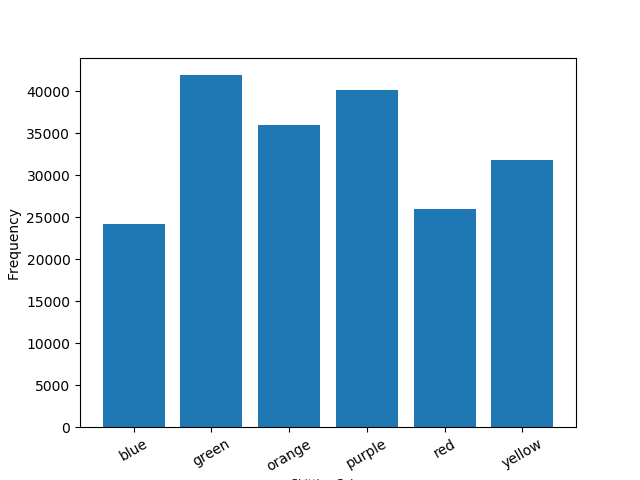

In [6]:
# set the size of the simulation
SimSize = 2000

# initialize the array to the desired size and data type (string in this case)
color = np.full(shape=SimSize, fill_value="colors") 

# capture each simulation run using an index (i in this case)
for i in range(SimSize):
    rand = np.random.uniform(low=0.0, high=1.0, size=1)
    
    if rand <= 0.20: 
        color[i] = "purple"
    elif  (rand > 0.20 and rand <= .36):  
        color[i] = "yellow"
    elif  (rand > 0.36 and rand <=.57):
        color[i] = "green"    
    elif  (rand > 0.57 and rand <=.75):
        color[i] = "orange"  
    elif  (rand > 0.75 and rand <=.88):
        color[i] = "red"
    else:
        color[i] = "blue"

# view the outcomes, omit this for large simulation sizes
print(color)

# summarize the counts in a frequency table
unique_elements, counts_elements = np.unique(color, return_counts=True)
print("Frequency of each color:")
print(np.asarray((unique_elements, counts_elements)))

plt.figure(1)
# summarize the results in a par graph
plt.bar(unique_elements, counts_elements)
plt.xlabel('Skittles Color', fontsize=8)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(unique_elements, unique_elements, fontsize=10, rotation=30)
plt.show()

### Using Arrays

Instead of generating simulation replicates using a "for" loop, generate all of the simulation values in one line using an array.  This is particularly useful when generating from continuous distributions.

Change SimSize to 1000, comment out the line **print("All observations:",a)**, and run the cell.

All observations: [18.65048163 22.56560447 22.97182861 23.64065078 27.64594389 24.18298529
 20.61497898 23.29955857 22.51737624 12.23645708 23.41713327 18.49719709
 18.44463762 22.89115247 24.00598445 21.56101045 26.01035907 20.17282943
 16.63439669 18.36199805 17.4064927  23.32675399 27.99218813 22.88746637
 18.5580517  15.96862045 26.59145137 20.48668228 17.29330473 19.53487836
 17.23608802 28.50080558 18.601053   17.69589431 21.09878532 20.73325117
 17.16123466 18.72913329 23.91000928 17.75180847 17.30504585 18.84310531
 16.50803215 26.6037855  26.73449038 20.4193283  17.56904268 17.40231222
 16.81905839 19.38057678 23.89387193 17.0089442  23.20124913 16.8501394
 23.00334068 22.15271884 15.96715089 21.20600774 20.6248657  21.02744793
 12.42158101 19.2836362  23.34043868 21.03000214 16.81103754 16.38788764
 21.7790902  19.34621028 27.526308   23.7024502  11.1875865  20.25677612
 15.37343611 18.96528562 14.42219116 18.69325485 22.86848801 19.46341502
 26.87017394 22.54883921 19.738065

<IPython.core.display.Javascript object>


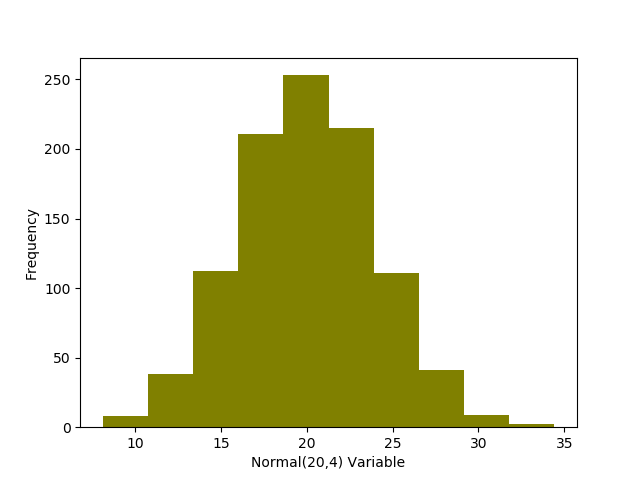

Text(0.5, 0, 'Normal(20,4) Variable')

In [7]:
# set the size of the simulation
SimSize = 1000

# generate multiple observations from a normal distribution with mean 20 and std dev 4
a = np.random.normal(loc=20,scale=4,size=SimSize)

# comment this out for large simulation sizes
print("All observations:",a) 

# summarize with some descriptive statistics
print("The average is {:2.1f}".format(np.mean(a)))
print("The standard deviation is {:2.1f}".format(np.std(a)))

plt.figure(2)
# display Winnings in a histogram
plt.hist(a,color="olive")
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('Normal(20,4) Variable', fontsize=10)

## Random Number Seeds

You should have noticed when running the cells above multiple times that the results vary each time the random numbers are generated.  A simulation can be reproduced exactly by specifying a random number seed so that the (pseudo-)random numbers generated will have the same initial value to start the process of random number generation.

Run the following cell a few times to see if the results vary.  Change the random number seed to a different value and run the cell again.  Just pick any number you want for the seed.  Did the results change when the random number seed changed?

Go back to the original seed of 5 and run the cell again.  What happens?  Do you recognize the result? 

All observations: [18.75286531 22.91601569 20.87128315 16.40363281 10.05287739 23.65300608
 24.5082549  13.94362709 26.55716433 18.28042559 30.52512223 22.407289
 18.65647354 24.95095137 20.44451267 20.51660499 20.30451045 19.37948737
 22.53690137 23.24262001 21.41923444 27.25036126 14.57409678 18.14547214
 23.29861538 15.29427408 26.25795864 22.85082038 19.27597361 22.1367981
 17.65354816 14.07258692 23.42899047 23.77239595 20.45776574 19.91217327
 11.49142181 16.66237013 18.13796676 20.93484236]
The average is 20.4
The standard deviation is 4.2


<IPython.core.display.Javascript object>


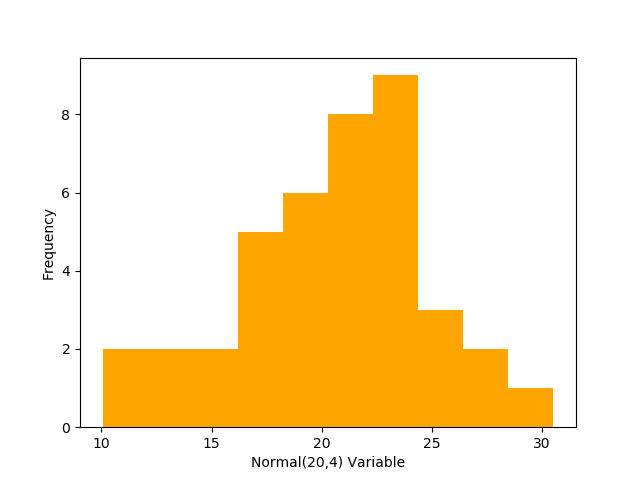

Text(0.5, 0, 'Normal(20,4) Variable')

In [10]:
np.random.seed(seed=6)

# set the size of the simulation
SimSize = 40

# generate multiple observations from a normal distribution with mean 20 and std dev 4
a = np.random.normal(loc=20,scale=4,size=SimSize)

# comment this out for large simulation sizes
print("All observations:",a) 

# summarize with some descriptive statistics
print("The average is {:2.1f}".format(np.mean(a)))
print("The standard deviation is {:2.1f}".format(np.std(a)))

plt.figure(3)
# display Winnings in a histogram
plt.hist(a,color="orange")
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('Normal(20,4) Variable', fontsize=10)

## <font color = "blue"> Self-Assessment: Discrete-Event Simulation </font>

**Textbook Problem 20.1**

20.1-1. Use the uniform random numbers in cells C13:C18 of Fig. 20.1 to generate six random observations for each of the following situations. (hint: **don't** use the computer for this one, *just use the random numbers printed in cells C13:C18 of Fig. 20.1 on p. 896*)

(a) Throwing an unbiased coin.

(b) A baseball pitcher who throws a strike 60 percent of the time and a ball 40 percent of the time.

(c) The color of a traffic light found by a randomly arriving car when it is green 40 percent of the time, yellow 10 percent of the time, and red 50 percent of the time.

## <font color = "blue"> Self-Assessment: Discrete-Event Simulation 2 </font>

**Textbook Problem 20.3 (a,b,e)**

Jessica Williams, manager of Kitchen Appliances for the Midtown Department Store, feels that her inventory levels of stoves have been running higher than necessary. Before revising the inventory policy for stoves, she records the number sold each day over a period of 25 days, as summarized below.

$
\begin{array}{l|ccccc}
  \hline
\text{Number sold}    & 2 & 3 & 4 & 5 & 6  \\  
\hline
\text{Number of days} & 4 & 7 & 8 & 5 & 1   \\
\hline
\end{array}
$

(a) Use these data to estimate the probability distribution of daily sales.

(b) Calculate the mean of the distribution obtained in part (a).

(e) Formulate a model in Python for performing a simulation of the daily sales. Perform 300 replications and obtain the average of the sales over the 300 simulated days. (Use **np.random.seed(seed=222)** and let's see if we all get the same answer.)

*Note: this example shows a simulation for a situation where the outcome of interest, the mean sales in this case, can be computed analytically and so there is really no need to simulate it.  The analytical solution is a constant, whereas the simulation has inherent variability.  Simulation is best employed in situation where the analytical solution is intractable or at least so difficult that simulation is worthwhile.*

# Examples

## Coin Flip Simulation (from Textbook)

In the Coin-Flipping Game simulation example on pp. 894-899 in the Hillier textbook each play of the game involves repeatedly flipping an unbiased coin until the difference between the number of heads tossed and the number of tails is 3.  If you decide to play the game, you are required to pay \\$1 for each flip of the coin. You are not allowed to quit during a play of the game.  You receive $8 at the end of each play of the game.

This situation may have an analytical solution, but it would take considerable work to get through it.  In this case, good insight into the behavior of this game can be gleaned from a fairly simple simulation. The textbook authors discuss the Excel implementation of this simulation in detail. The same simulation is constructed in Python in the cell below.

Run the simulation a few times to see the variability in the results. Notice the types of summaries that can be made of the simulation results: descriptive statistics like mean, standard deviation, minimum, and maximum, as well as graphical summaries like histograms or boxlots.

In this textbook, they commonly ask for 1000 replications in a given simulation, but with today's computing power you could easily increase that number to 10,000 or 100,000 or more depending on what you have to work with.  In simulation, a bigger the simulation size means more precise simulation results (*i.e.* the results are closer to the actual underlying values).

The average amount won is -$1.01
The standard deviation of the winnings is $6.93
The minimum amount won is -$91.00
The maximum amount won is $5.00

The probability of winning money is 0.577

The average number of flips is 9.0
The minimum number of flips is 3
The maximum number of flips is 99


<IPython.core.display.Javascript object>


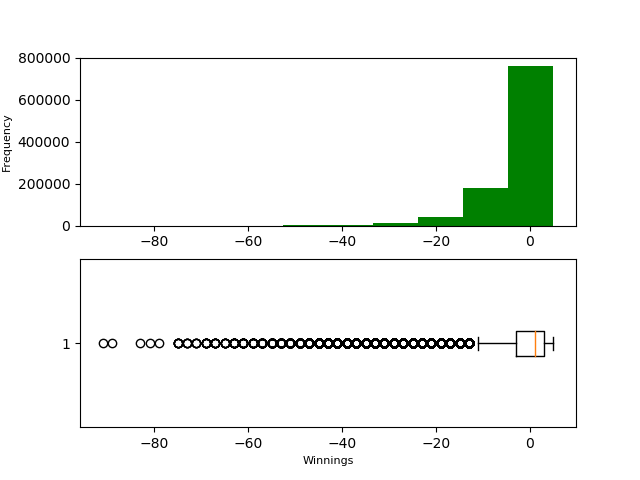

Text(0.5, 0, 'Winnings')

In [12]:
# Coin-Flipping Game Simulation
# 1. Each play of the game involves repeatedly flipping an
#    unbiased coin until the difference between the number of
#    heads tossed and the number of tails is 3.
# 2. If you decide to play the game, you are required to pay
#    $1 for each flip of the coin. You are not allowed to quit
#    during a play of the game.
# 3. You receive $8 at the end of each play of the game.

import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

# np.random.seed(seed=123) # optional - specify a seed to reproduce the simulation exactly
SimSize = 1000000  # set number of trials in the simulation

RequiredDifference = 3
CashAtEnd = 8

nn = 1  # set simulation clock to 1 to begin simulation
Winnings = np.zeros(SimSize)
FlipTotal = np.zeros(SimSize)

for nn in range(SimSize):

    # Simulate one round of the coin-flipping game
    heads = 0  # number of heads observed
    tails = 0  # number of tails
    Difference = 0
    Flips = 0
    while Difference < RequiredDifference:
        if np.random.uniform(low=0, high=1, size=1) < 0.5:
            heads += 1  # add one to the total heads
        else:
            tails += 1  # add one to the total tails

        Difference = abs(heads - tails)
        Flips = heads + tails

    # Summarize results for each round of the coin flipping game
    Winnings[nn] = CashAtEnd - Flips

    # capture the number of flips
    FlipTotal[nn] = Flips

    # advance the simulation another replication
    nn = nn + 1

# Summarize results for the simulation
import babel.numbers as numbers  # needed to display as currency

print("The average amount won is",
      numbers.format_currency(np.mean(Winnings), 'USD', locale='en_US'))
print("The standard deviation of the winnings is",
      numbers.format_currency(np.std(Winnings), 'USD', locale='en_US'))
print("The minimum amount won is",
      numbers.format_currency(np.min(Winnings), 'USD', locale='en_US'))
print("The maximum amount won is",
      numbers.format_currency(np.max(Winnings), 'USD', locale='en_US'))

p = np.sum(Winnings > 0) / SimSize
print("\nThe probability of winning money is {:0.3f}".format(p))

print("\nThe average number of flips is {:2.1f}".format(np.mean(FlipTotal)))
print("The minimum number of flips is {:d}".format(int(np.min(FlipTotal))))
print("The maximum number of flips is {:d}".format(int(np.max(FlipTotal))))

plt.figure(1)

# display Winnings in a histogram
plt.subplot(211)
plt.hist(Winnings, color="g")
plt.ylabel('Frequency', fontsize=8)

# display Winnings in a boxplot
plt.subplot(212)
plt.boxplot(Winnings, vert=False)
plt.xlabel('Winnings', fontsize=8)

## Textbook Problem 20.6-3

The Avery Co. factory has been having a maintenance problem with the control panel for one of its production processes. This control panel contains four identical electromechanical relays that have been the cause of the trouble. The problem is that the relays fail fairly frequently, thereby forcing the control panel (and the production process it controls) to be shut down while a replacement is made. The current practice is to replace the relays only when they fail. 

The average total cost of doing this has been \\$3.19 per hour. To attempt to reduce this cost, a proposal has been made to replace all four relays whenever any one of them fails to reduce the frequency with which the control panel must be shut down. Would this actually reduce the cost?

The pertinent data are the following. For each relay, the operating time until failure has approximately a uniform distribution from 1,000 to 2,000 hours. The control panel must be shut down for one hour to replace one relay or for two hours to replace all four relays. The total cost associated with shutting down the control panel and replacing relays is \\$1,000 per hour plus \\$200 for each new relay.

Use simulation on a spreadsheet to evaluate the cost of the proposal and compare it to the current practice. Perform 1,000 trials (where the end of each trial coincides with the end of a shutdown of the control panel) and determine the average cost per hour.

The average cost is $2.38
The standard deviation of the cost is $0.29


<IPython.core.display.Javascript object>


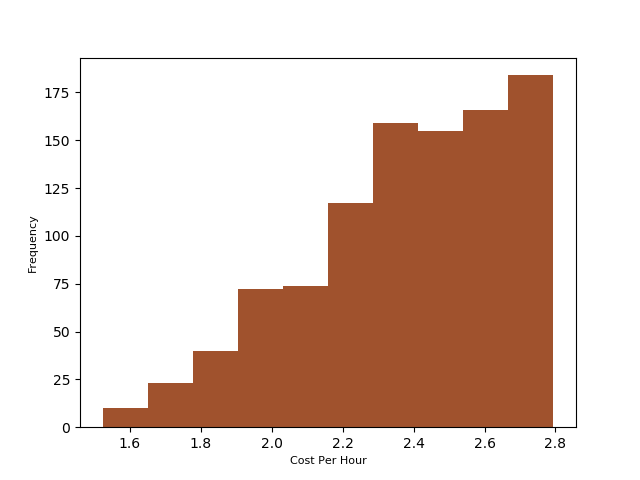

Text(0.5, 0, 'Cost Per Hour')

In [15]:
# Simulation for Problem 20.6-3

import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

# set.seed(8) # optional - specify a seed to reproduce the simulation exactly
SimSize=1000 # set number of trials in the simulation

# Generate rondom observations for the 4 relays for the entire simultion
relay1 = np.random.uniform(low=1000, high=2000, size=SimSize)
relay2 = np.random.uniform(low=1000, high=2000, size=SimSize)
relay3 = np.random.uniform(low=1000, high=2000, size=SimSize)
relay4 = np.random.uniform(low=1000, high=2000, size=SimSize)

# create an array of failure times
failures = np.array([relay1,relay2,relay3,relay4])

# find the min of each column, which is the time to first failure (TTFF)
TTFF = np.amin(failures,axis=0) 

# time to replace all 4 relays is 2 hours, a constant here
RepairTime = 2

# compure total time, time to failure plus the repair time
TotalTime = TTFF + RepairTime

# compute the total cost $1000/hr for 2 hours, $200/relay for 4 relays, constant
TotalCost = 1000*2+200*4

# compute the cost per hour
CostPerHour = TotalCost/TotalTime

# Summarize results for the simulation
import babel.numbers as numbers  # needed to display as currency

print("The average cost is",
      numbers.format_currency(np.mean(CostPerHour), 'USD', locale='en_US'))
print("The standard deviation of the cost is",
      numbers.format_currency(np.std(CostPerHour), 'USD', locale='en_US'))

# compare CostPerHour to the current cost of $3.19 
plt.figure(1)

# display Winnings in a histogram
plt.hist(CostPerHour, color="sienna")
plt.ylabel('Frequency', fontsize=8)
plt.xlabel('Cost Per Hour', fontsize=8)

The average cost per hour is near \\$2.37 per hour, which is well below the current average of \\$3.19 per hour.  In fact, even the maximum cost per hour of the 1000 replications in the simulation is less than the \\$3.19 per hour, so clearly the policy of replacing all four relays when the any one of them fails is more cost-effective.  

# Further Analysis of Simulation Results

## Parameter Analysis and Trend Charts 

The **Freddy the Newsboy** simulation on pp. 923-939 of the Hillier textbook is constructed below in the next Python code cell.

### Freddie the Newsboy Simulation

The average cost is $46.00
The standard deviation of the cost is $13.72


<IPython.core.display.Javascript object>


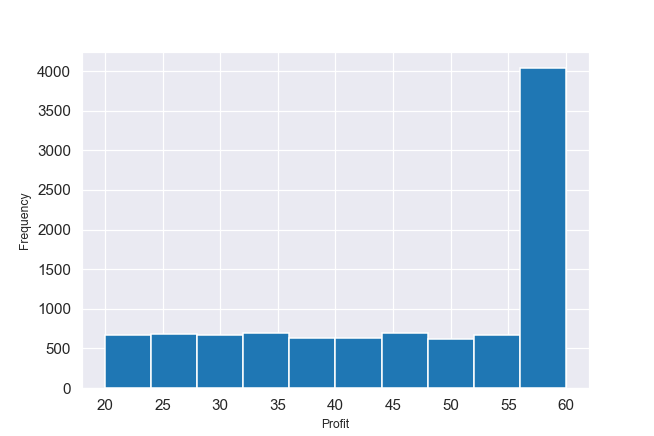

In [3]:
# Freddie the Newsboy Simulation

%matplotlib notebook
import matplotlib.pyplot as plt
import babel.numbers as numbers
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_style("darkgrid")

# np.random.seed(seed=123) # optional - specify a seed to reproduce the simulation exactly
sim_size = 10000  # set number of trials in the simulation

# establish the constants in the simulation
unit_sale_price = 2.50
unit_purchase_cost = 1.50
unit_salvage_value = 0.50

def profit_simulator(qty):
    order_quantity = np.full(sim_size, qty)
    demand = np.random.randint(low=40, high=70, size=sim_size)
    sales_revenue = unit_sale_price * np.minimum(order_quantity, demand)
    purchasing_cost = unit_purchase_cost * order_quantity
    salvage_value = unit_salvage_value * np.maximum(order_quantity - demand,
                                                    np.zeros(sim_size))
    profit_sim = sales_revenue - purchasing_cost + salvage_value
    return (profit_sim)

profit = profit_simulator(60)

# summarize results
print("The average cost is",
      numbers.format_currency(np.mean(profit), 'USD', locale='en_US'))
print("The standard deviation of the cost is",
      numbers.format_currency(np.std(profit), 'USD', locale='en_US'))

# display Winnings in a histogram
fig, ax = plt.subplots(figsize=(6, 4));
ax.hist(profit);
plt.ylabel('Frequency', fontsize=8);
plt.xlabel('Profit', fontsize=8);

### Freddie the Newsboy Simulation with Parameter Analysis for Order Quantity

In [4]:
# Freddie the Newsboy Simulation with Parameter Analysis for Order Quantity
# simulation constants and sim_size defined in previous cell

def profit_stats(qty):
    # input: qty = order quantity
    # output: [mean profit, 5th percentile, 95th percentile]
    profit = profit_simulator(qty)
    mean_profit = np.mean(profit)
    [lower, upper] = np.quantile(profit, [.05, .95])
    return ((mean_profit, lower, upper))

order_quantity = np.arange(40, 71, 5)  # need to go over 70 to include 70
num_quantities = len(order_quantity)
mean_profit = np.zeros(num_quantities)
pctl_05 = np.zeros(num_quantities)
pctl_95 = np.zeros(num_quantities)

# collect simulation results for all order quantites
for i in range(num_quantities):
    mean_profit[i], pctl_05[i], pctl_95[i] = profit_stats(order_quantity[i])

# put results in dataframe for nice display and plotting in next cell
df = pd.DataFrame({
    'OrderQuantity': order_quantity,
    'MeanProfit': mean_profit,
    'Pctl_05': pctl_05,
    'Pctl_95': pctl_95
})
df

,OrderQuantity,MeanProfit,Pctl_05,Pctl_95
0,40,40.0000,40.0,40.0
1,45,43.9508,37.0,45.0
2,50,46.3372,32.0,50.0
3,55,46.9854,27.0,55.0
4,60,45.8876,22.0,60.0
5,65,43.3786,17.0,65.0
6,70,38.8896,12.0,66.0


<IPython.core.display.Javascript object>


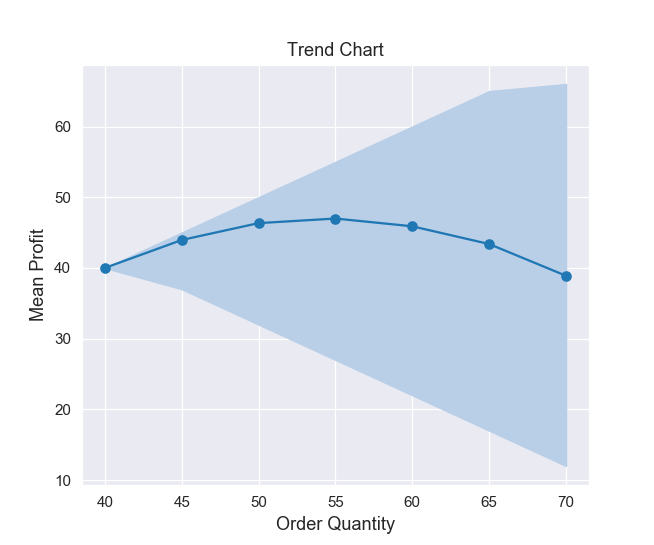

In [5]:
# plot results and trend chart showing middle 90% of simulated profits for each order quantity
fig, ax = plt.subplots(figsize=(6, 5))
ax.plot('OrderQuantity','MeanProfit',data=df, linestyle='-', marker='o');
plt.xlabel('Order Quantity', fontsize=12);
plt.ylabel('Mean Profit', fontsize=12);
plt.title("Trend Chart");
ax.fill_between('OrderQuantity','Pctl_05','Pctl_95',data=df,color="#b9cfe7", edgecolor="");

## Optimization Within a Simulation

### Freddie the Newsboy: find maximum average profit

In [9]:
# find maximum average profit
# results will vary slightly on each run

from scipy.optimize import minimize_scalar

# to maximize we minimize the negative profit
def neg_mean_profit( qty ):
    return( -profit_stats(qty)[0] ) # simulate stats and return just mean

result = minimize_scalar(neg_mean_profit,bounds=[40,70],method='bounded')

# summarize results
print("The maximum average profit is approximately ",
      numbers.format_currency(-result['fun'], 'USD', locale='en_US')+".")
print("The optimal order quantity is approximately {:2.0f}".format(result['x'])+" newspapers.")

The maximum average profit is approximately  $47.20.
The optimal order quantity is approximately 55 newspapers.


# More Self-Assessment

## <font color = "blue"> Self-Assessment: Simulation Results </font>

True or False: Simulations provide exact results just like analytical methods.

## <font color = "blue"> Self-Assessment: Simulating Outcomes </font>

An algorithm that produces sequences of numbers that follow a specified probability distribution and possess the appearance of randomness is a
 
a. warm-up period.

b. simulation clock.

c. financial risk analysis.

d. random number generator. 

e. continuous simulation.


## <font color = "blue"> Self-Assessment: Random Variables in Simulation </font>

True or False: If the distribution of a random variable in a simulation is unknown, then a normal distribution should always be used. 

## <font color = "blue"> Self-Assessment: Simulation Reproducibility </font>

Simulation results can be reproduced exactly by running the simulation again using the same

a. seed.

b. computer.

c. plant.

d. method of random number generation.

e. simulation clock.